# Importation des bibliothèques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from rnn_model import RNN

# Importation du dataset 

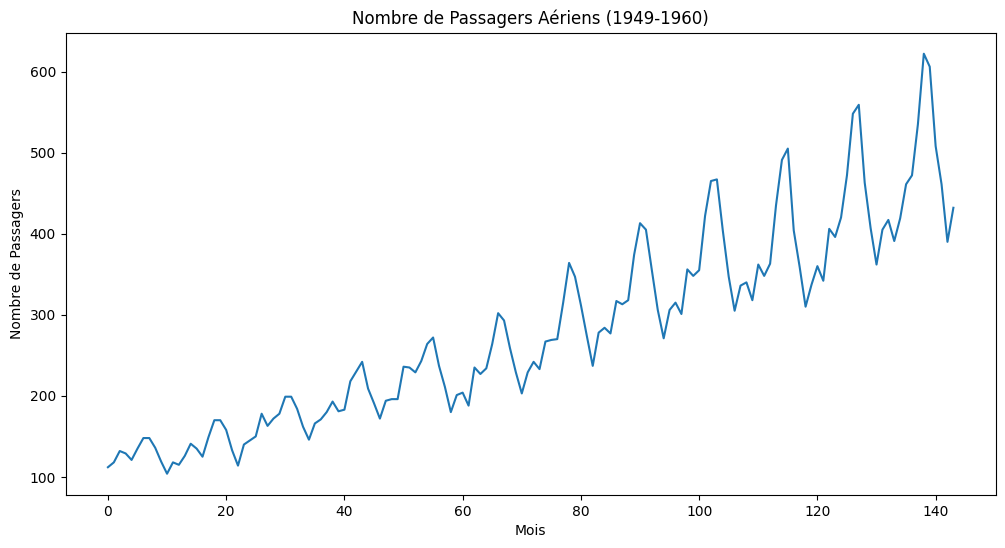

In [2]:
# Chargement du dataset
data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = np.loadtxt(data_url, delimiter=',', skiprows=1, usecols=1)

# Affichage de la série temporelle
plt.figure(figsize=(12,6))
plt.plot(data)
plt.title('Nombre de Passagers Aériens (1949-1960)')
plt.xlabel('Mois')
plt.ylabel('Nombre de Passagers')
plt.show()

# Pré traitement des données
# Mise en forme des données
data = data.reshape(-1, 1)

# Normalisation des données entre 0 et 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Création des séquences pour le RNN

In [3]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(data_normalized, seq_length)

print("Shape de X :", X.shape)
print("Shape de y :", y.shape)

# Division en données de train/test
train_size = int(len(X) * 0.8)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

print("Taille de l'ensemble d'entraînement :", X_train.shape[0])
print("Taille de l'ensemble de test :", X_test.shape[0])

Shape de X : (134, 10, 1)
Shape de y : (134, 1)
Taille de l'ensemble d'entraînement : 107
Taille de l'ensemble de test : 27


# Restructuration des Données pour le Modèle

Le RNN attend une séquence d'entrées sous forme de liste.

In [4]:
# Conversion des données d'entraînement
X_train_seq = [X_train[i] for i in range(len(X_train))]
y_train_seq = [y_train[i] for i in range(len(y_train))]

# Conversion des données de test
X_test_seq = [X_test[i] for i in range(len(X_test))]
y_test_seq = [y_test[i] for i in range(len(y_test))]

# Entraînement du modèle

Epoch 0, Loss: 0.020136815399886446
Epoch 10, Loss: 0.007793817063310425
Epoch 20, Loss: 0.0023734068059270853
Epoch 30, Loss: 0.00257229359901809
Epoch 40, Loss: 0.0026652095010548126
Epoch 50, Loss: 0.0027579898246191926
Epoch 60, Loss: 0.002840743474755098
Epoch 70, Loss: 0.002881283804353714
Epoch 80, Loss: 0.002860312358041968
Epoch 90, Loss: 0.0028802772483350727
Epoch 100, Loss: 0.002983466676187955
Epoch 110, Loss: 0.0030740551156734704
Epoch 120, Loss: 0.0031139027724145785
Epoch 130, Loss: 0.0031055924663078976
Epoch 140, Loss: 0.003056862485463008
Epoch 150, Loss: 0.0029800342497150515
Epoch 160, Loss: 0.002888158518706527
Epoch 170, Loss: 0.0027865822073038925
Epoch 180, Loss: 0.0026888609778308262
Epoch 190, Loss: 0.00260540160797232
[0.020136815399886446, 0.007793817063310425, 0.0023734068059270853, 0.00257229359901809, 0.0026652095010548126, 0.0027579898246191926, 0.002840743474755098, 0.002881283804353714, 0.002860312358041968, 0.0028802772483350727, 0.00298346667618795

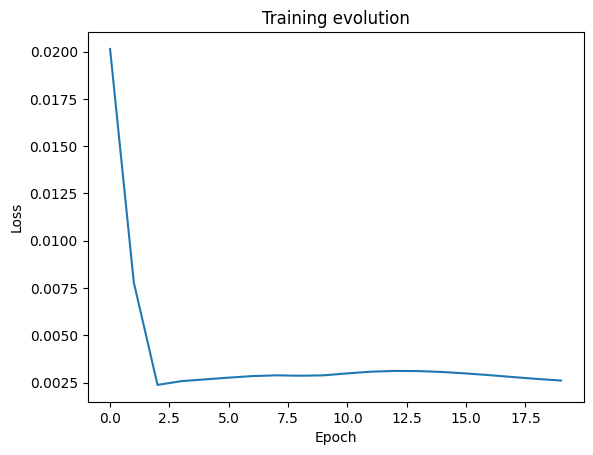

In [5]:
# Création du modèle
rnn = RNN(input_size=1, hidden_size=10, output_size=1)

# Entraînement du modèle
losses = rnn.train(X_train_seq, y_train_seq, epochs=200, learning_rate=0.01)

print(losses)
plt.plot(losses)
plt.title("Training evolution")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Evaluation du modèle

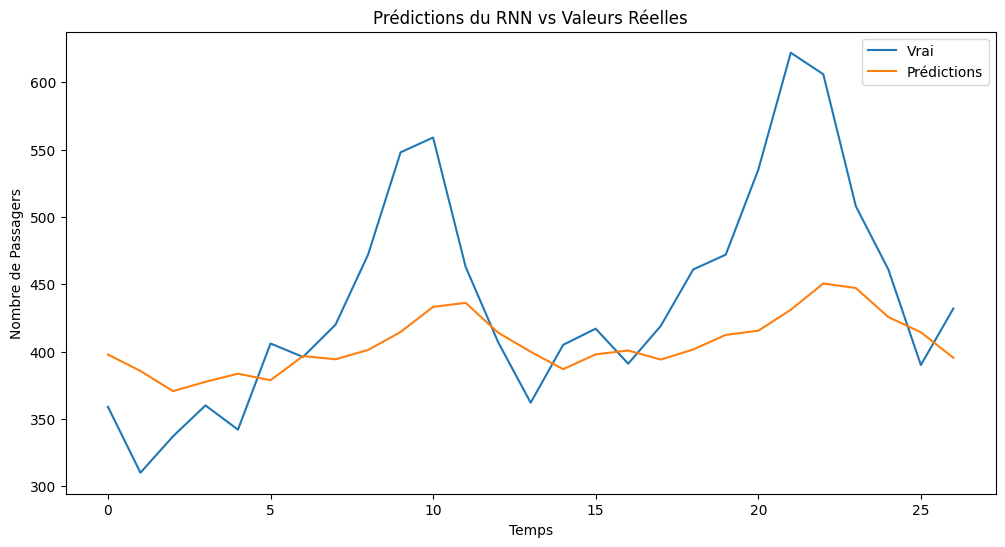

Erreur Moyenne Absolue (MAE) sur l'ensemble de test : 54.69


In [6]:
# Prédictions sur l'ensemble de test
predictions = []
for inputs in X_test_seq:
    pred = rnn.predict(inputs)
    predictions.append(pred.flatten())

predictions = np.array(predictions)

# Inverse de la normalisation
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test_seq)

# Affichage des résultats
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label='Vrai')
plt.plot(predictions_rescaled, label='Prédictions')
plt.title('Prédictions du RNN vs Valeurs Réelles')
plt.xlabel('Temps')
plt.ylabel('Nombre de Passagers')
plt.legend()
plt.show()

# Calcul de l'Erreur Moyenne Absolue (MAE)
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
print(f"Erreur Moyenne Absolue (MAE) sur l'ensemble de test : {mae:.2f}")